# Workplace resources and willingness to speak out:

*a study of Mental Health in Tech*

The data used in this notebook was downloaded from [Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey).
The source of the data was a survey done in 2014 by [OSMI](https://osmihelp.org/), a non-profit organization dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.


**Below is a description of the questions (columns) asked in the survey:**

| Column  | Description  |
|---|---|
| Timestamp  | Date survey was filled  |
| Gender  | Gender identity of surveyed person  |
| Country  | Country of residence  |
| State  | US residents only  |
| self_employed  | Are you self-employed?   |
| family_history  | Do you have a family history of mental illness?  |
| treatment  | Have you sought treatment for a mental health condition?  |
| work_interfere  | If you have a mental health condition, do you feel that it interferes with your work?  |
| no_employees  | How many employees does your company or organization have?  |
| remote_work  | Do you work remotely (outside of an office) at least 50% of the time?  |
| tech_company  | Is your employer primarily a tech company/organization?  |
| benefits  | Does your employer provide mental health benefits?  |
| care_options  | Do you know the options for mental health care your employer provides?  |
| wellness_program  | Has your employer ever discussed mental health as part of an employee wellness program?  |
| seek_help  | Does your employer provide resources to learn more about mental health issues and how to seek help?  |
| anonymity  | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?  |
| leave  | How easy is it for you to take medical leave for a mental health condition?  |
| mental_health_consequence  | Do you think that discussing a mental health issue with your employer would have negative consequences?  |
| phys_health_consequence  | Do you think that discussing a physical health issue with your employer would have negative consequences?  |
| coworkers  | Would you be willing to discuss a mental health issue with your coworkers?  |
| supervisors  | Would you be willing to discuss a mental health issue with your direct supervisor(s)?  |
| mental_health_interview  | Would you bring up a mental health issue with a potential employer in an interview?  |
| mental_vs_physical  | Do you feel that your employer takes mental health as seriously as physical health?  |
| obs_consequence  | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  |
| comments  | Any additional notes or comments?  |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Cleaning

In [2]:
df = pd.read_csv('survey.csv')
survey=df.copy()
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
# renaming columns to have all lowercase
survey.columns = [col.lower() for col in survey.columns]

# looking at dtypes, we can see all of them are pandas objects except for age that is int.
print(survey.dtypes)

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


- **after exploring some of the columns I have decided not to use the *timestamp, country, state or comments columns*.**
- **i don't think there are not enough data to do a geographical analysis.**

In [5]:
survey.drop(['timestamp', 'state', 'comments', 'country'], axis= 1, inplace= True)

In [6]:
# Remove duplicate rows
duplicates = survey.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
survey.drop_duplicates(inplace=True)

Number of duplicate rows: 4


In [7]:
# Handle missing data more robustly
missing_percent = survey.isnull().mean() * 100
print("Missing data percentage per column:")
print(missing_percent)

for col in survey.columns:
    if survey[col].isnull().sum() > 0:
        if survey[col].dtype == 'object':
            mode_val = survey[col].mode()[0]
            survey[col].fillna(mode_val, inplace=True)
        else:
            survey[col].fillna(survey[col].median(), inplace=True)

Missing data percentage per column:
age                           0.000000
gender                        0.000000
self_employed                 1.434263
family_history                0.000000
treatment                     0.000000
work_interfere               20.956175
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence               0.000000
dtype: float64


In [8]:
# after finding some weird responses in the age column ('such as 99999999 and -1729')
# i decided to only include 'valid' numbers for age
survey['age'] = survey['age'].apply(lambda x: x if 0 < x < 100 else np.nan)

In [9]:
survey['age'].isnull().sum()

5

In [10]:
survey['age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., nan, 43., 56., 60., 54., 55., 48., 20., 57., 58., 47.,
       62., 51., 65., 49.,  5., 53., 61.,  8., 11., 72.])

In [11]:
# Detect and cap outliers in 'age' column using IQR method
Q1 = survey['age'].quantile(0.25)
Q3 = survey['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = survey[(survey['age'] < (Q1 - 1.5 * IQR)) | (survey['age'] > (Q3 + 1.5 * IQR))]
print(f"Number of age outliers detected: {len(outliers)}")
survey['age'] = survey['age'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

Number of age outliers detected: 35


In [12]:
survey['gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [13]:
# first lower case and strip eveything to decrease options
survey['gender'] = survey['gender'].apply(lambda x: x.lower().strip())

# based on the replies made these lists manually, I hope to not offend anyone.
male = ['male', 'm', 'make', 'cis male', 'man', 'cis man', 'msle', 'malr', 'mail', 'maile', 'something kinda male?', 'ostensibly male, unsure what that really means', 'male-ish', 'guy (-ish) ^_^', 'mal', 'male (cis)']
female = ['female', 'f', 'woman', 'female (cis)', 'cis-female/femme', 'femake', 'cis female', 'femail']

def regender(gender_input):
    
    """
    Input: a string about gender
    Output: male, female or other depending on our dictionary
    
    """ 
    if gender_input in male:
        return 'male'
    elif gender_input in female:
        return 'female'
    else:
        return 'other'
    
survey['gender'] = survey['gender'].apply(regender)

survey.gender.value_counts(dropna= False)

gender
male      990
female    247
other      18
Name: count, dtype: int64

In [14]:
# checking for nans
nan_cols = []
for col in survey.columns:
    if survey[col].isnull().sum():
        print(col + ' (%): ' + str(sum(survey[col].isnull())/len(survey)))
        nan_cols += [col]

# nans are present in the self-employed column and in the work_interfere column.
# at most there are 20% of values with nans so we'll replace with 'Don't know'
for col in nan_cols:
    survey[col].fillna("Don't know", inplace= True)

# i'm just gonna drop the rows without age.
survey = survey[survey.age != "Don't know"]

# in the context of our questions we need to drop everyone who is self-employed
print(survey['self_employed'].value_counts())
survey.loc[survey['self_employed'] == 'Yes'] = np.nan
survey.dropna(inplace=True)

age (%): 0.00398406374501992
self_employed
No     1107
Yes     143
Name: count, dtype: int64


- **it seems the rest of the columns are questions that might be yes or no, with few additional options**
- **we can identify that by checking the possible answers in each question**

In [15]:
# getting unique answers for every column
exclude = ['age']
possible_answers = {col:[i for i in survey[col].unique()] for col in survey.columns if col not in exclude}
possible_answers

{'gender': ['female', 'male', 'other'],
 'self_employed': ['No'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes'],
 'no_employees': ['6-25',
  'More than 1000',
  '26-100',
  '100-500',
  '1-5',
  '500-1000'],
 'remote_work': ['No', 'Yes'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['Yes', "Don't know", 'No'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['Yes', "Don't know", 'No'],
 'anonymity': ['Yes', "Don't know", 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'mental_health_consequence': ['No', 'Maybe', 'Yes'],
 'phys_health_consequence': ['No', 'Yes', 'Maybe'],
 'coworkers': ['Some of them', 'No', 'Yes'],
 'supervisor': ['Yes', 'No', 'Some of them'],
 'mental_health_interview': ['No', 'Yes', 'Maybe'],
 'phys_health_interview': ['Maybe', 'No', 'Yes'],
 'mental_vs_physical': ['Y

- **after looking at these answer possibilities want to normalize all 'half-answers' to 'Don't know', so changing 'Not sure' and 'Maybes'**
- **this decision might be open for interpretation, but I made a judgement call for the sake of consistency**

In [16]:
def replace_uncertainty(survey_answer):
    """
    Uniformizes all uncertain answers.
    Input: half-answer (string)
    Output: 'Don't know'
    
    """
    
    uncertainty = ['Maybe', 'Some of them', 'Not sure']
    if survey_answer in uncertainty:
        return "Don't know"
    else:
        return survey_answer

# apply function to all columns
for col in survey.columns:
    survey[col] = survey[col].apply(replace_uncertainty)

survey.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Don't know,Yes,No,Don't know,Yes,No
1,44.0,male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Don't know,No,No,No,No,No,Don't know,No
2,32.0,male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Don't know,No,Don't know,Don't know,No,Yes
4,31.0,male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Don't know,Yes,Yes,Yes,Don't know,No


- **the column 'care_options' asks the question: "Do you know the options for mental health care your employer provides?" and about 30% of the answers are 'Dont know'.** 
- **Replace 'don't know' with No.**

In [17]:
survey['care_options'] = survey['care_options'].replace(to_replace="Don't know", value= 'No')
survey['care_options'].value_counts()

care_options
No     728
Yes    379
Name: count, dtype: int64

In [18]:
for col in survey.select_dtypes(include='object').columns:
    survey[col] = survey[col].astype('category')

In [19]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        1107 non-null   float64 
 1   gender                     1107 non-null   category
 2   self_employed              1107 non-null   category
 3   family_history             1107 non-null   category
 4   treatment                  1107 non-null   category
 5   work_interfere             1107 non-null   category
 6   no_employees               1107 non-null   category
 7   remote_work                1107 non-null   category
 8   tech_company               1107 non-null   category
 9   benefits                   1107 non-null   category
 10  care_options               1107 non-null   category
 11  wellness_program           1107 non-null   category
 12  seek_help                  1107 non-null   category
 13  anonymity                  1107 non-nu

## 2. Exploratory Data Analysis

**I'm gonna do an agnostic analysis and just make a correlation matrix bewteen all the variables.**

1. The first thing I'll do is encode all the answers as numbers.
- **Important notes:**
- All the half answers go in the middle (0)

In [20]:
# create a dictionary to map out all the answers in the survey
encoding_dict = {'No': -1, "Don't know": 0, 'Yes': 1,
                 'Never': -2, 'Rarely': -1, 'Sometimes': 1, 'Often': 2,
                 'Very difficult': -2, 'Somewhat difficult': -1, 'Somewhat easy': 1, 'Very easy': 2,
                 '1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5,
                 'male': -1, 'other': 0, 'female': 1}

In [21]:
# made a copy just to check values
survey_coded = survey.copy()

# for each column except the ones not excluded change the values in our dictionary
for col in survey_coded.columns:
    
    if col not in exclude:
        survey_coded[col] = survey_coded[col].map(encoding_dict)

In [63]:
# let's take a look at our answer-encoded dataframe.
survey_coded

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,1,-1,-1,1,2,1,-1,1,1,...,1,1,-1,-1,0,1,-1,0,1,-1
1,44.0,-1,-1,-1,-1,-1,5,-1,-1,0,...,0,0,0,-1,-1,-1,-1,-1,0,-1
2,32.0,-1,-1,-1,-1,-1,1,-1,1,-1,...,0,-1,-1,-1,1,1,1,1,-1,-1
3,31.0,-1,-1,1,1,2,2,-1,1,-1,...,-1,-1,1,1,0,-1,0,0,-1,1
4,31.0,-1,-1,-1,-1,-2,3,1,1,1,...,0,0,-1,-1,0,1,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,-1,-1,-1,1,1,2,-1,1,-1,...,0,1,-1,-1,0,0,-1,-1,0,-1
1255,32.0,-1,-1,1,1,2,2,1,1,1,...,1,-1,-1,-1,0,1,-1,-1,1,-1
1256,34.0,-1,-1,1,1,1,5,-1,1,1,...,0,-1,1,1,-1,-1,-1,-1,-1,-1
1257,46.0,1,-1,-1,-1,1,3,1,1,-1,...,0,0,1,-1,-1,-1,-1,-1,-1,-1


- **I'm gonna make a correlation matrix across all the variables in the study**

In [22]:
# make the correlation matrix
correlation = survey_coded.corr()

<Axes: >

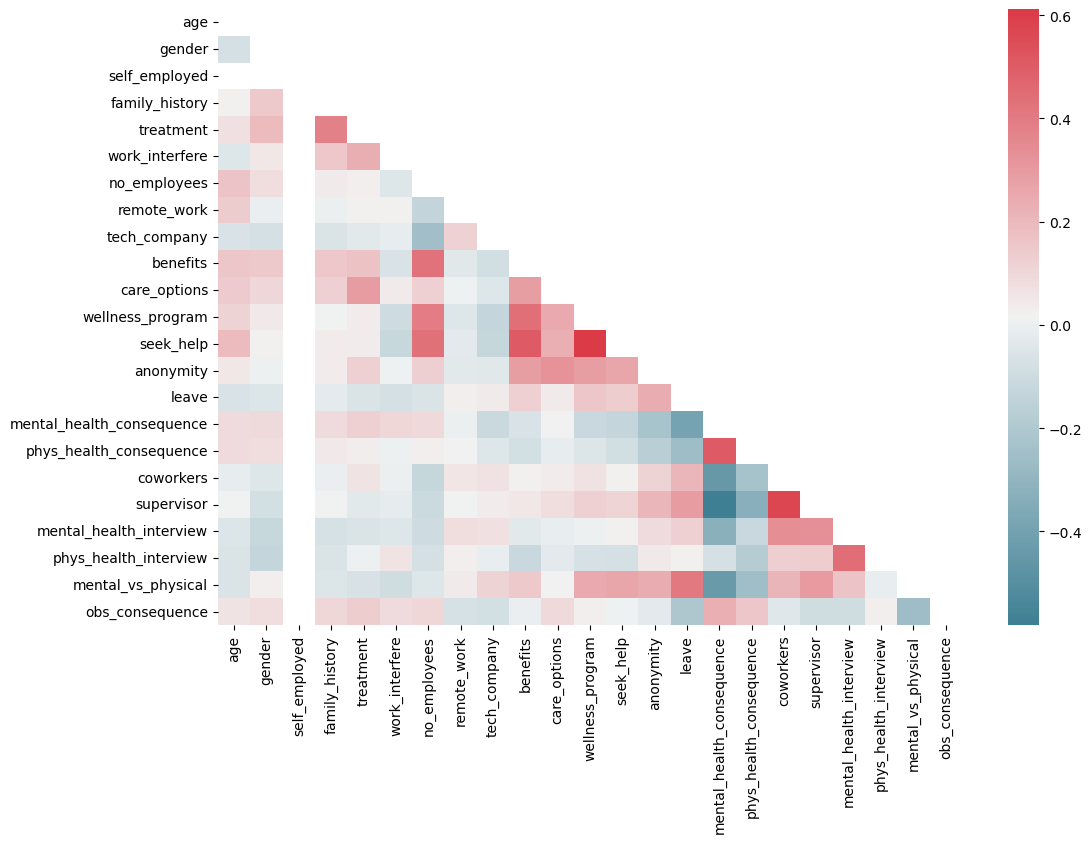

In [23]:
# making a mask to only show half the table cause its duplicated.
mask = np.triu(np.ones_like(correlation, dtype=bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap=cmap, mask=mask, annot= False)

## 3. Hypothesis-driven analysis

**To create a score for the willingness to speak, we combined all the columns that ask 'If you're willing to speak to someone about mental health**

**Following the same logic, I combined all the columns that ask about services provided by the company**

We combined these columns by adding them together, it was important to make sure they all 'move in the same direction'
The result of this are two columns:
1. 'workplace_resources': with a possible value ranging from -6 to 6 and is the score of the company
2. 'willingness': with a possible values ranging from -3 to 3 and is the metric of the employee

In [24]:
# define columns to combine
workplace_resources = ['benefits', 
                      'wellness_program', 
                      'anonymity', 
                      'seek_help', 
                      'leave']

willingness = ['coworkers',
               'supervisor',
               'mental_health_interview']

# add columns together
survey_coded['workplace_resources'] = survey_coded[workplace_resources].apply(pd.to_numeric).sum(axis=1)
survey_coded['willingness'] = survey_coded[willingness].apply(pd.to_numeric).sum(axis=1)

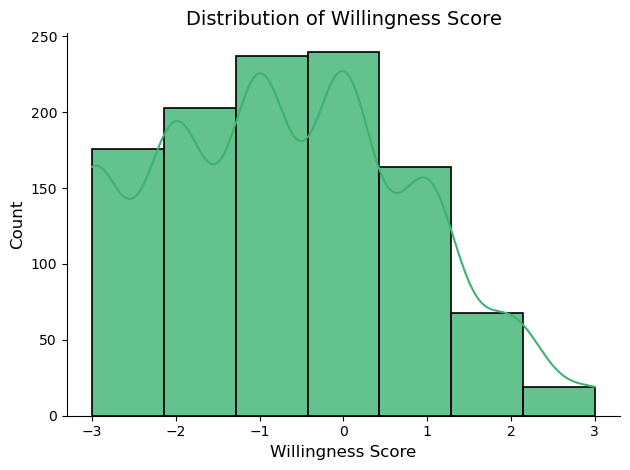

In [25]:
# Create histogram with KDE for 'willingness' column
sns.histplot(
    data=survey_coded,
    x='willingness',
    bins=survey_coded['willingness'].max() - survey_coded['willingness'].min() + 1,
    kde=True,
    color='mediumseagreen',
    edgecolor='black',
    linewidth=1.2,
    alpha=0.8
)

# Label the axes
plt.xlabel('Willingness Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Willingness Score', fontsize=14)

# Remove top and right spines for cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


**This looks like a right skewed distribution, meaning that the majority of people are unwilling to talk about mental health in their work environment.**

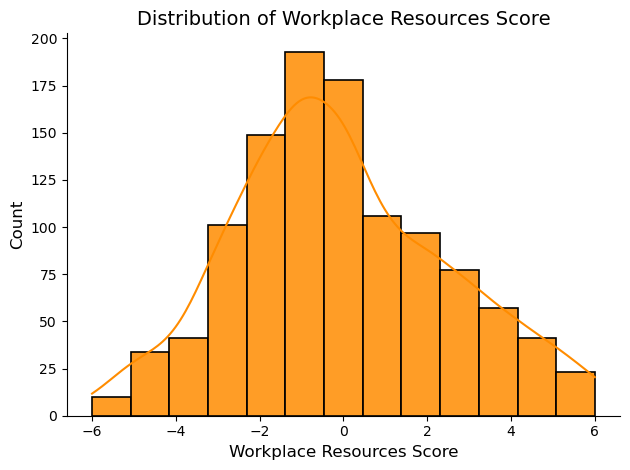

In [26]:
sns.histplot(
    data=survey_coded,
    x='workplace_resources',
    bins=survey_coded['workplace_resources'].max() - survey_coded['workplace_resources'].min() + 1,
    kde=True,
    color='darkorange',
    edgecolor='black',
    linewidth=1.2,
    alpha=0.85
)

# Set labels and title
plt.xlabel('Workplace Resources Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Workplace Resources Score', fontsize=14)

# Clean up the plot
sns.despine()
plt.tight_layout()
plt.show()


**This one looks more normally distributed but still centered left of the zero, meaning that the majority of companies don't have many mental health resources**

#### Before moving forwards, one of the first questions we can ask is: does having more mental health services mean that your employees are aware these services exist?

In [27]:
# interestingly to check the proportion of people aware of services I needed to recode the values in the
# care options column from 'No' = -1 to 'No' = 0
survey_coded['care_options'].replace(to_replace=-1, value=0, inplace= True)
survey_coded.pivot_table(index=['workplace_resources'], values=['care_options'], aggfunc= lambda x: sum(x)/len(x))

,care_options
workplace_resources,
-6,0.400000
-5,0.441176
-4,0.341463
-3,0.207921
-2,0.181208
-1,0.176166
0,0.252809
1,0.377358
2,0.432990


In [28]:
print(survey_coded['care_options'].unique())
print(survey_coded['care_options'].dtype)

[0, 1]
Categories (2, int64): [0, 1]
category


In [29]:
survey_coded['care_options'] = survey_coded['care_options'].astype(int)

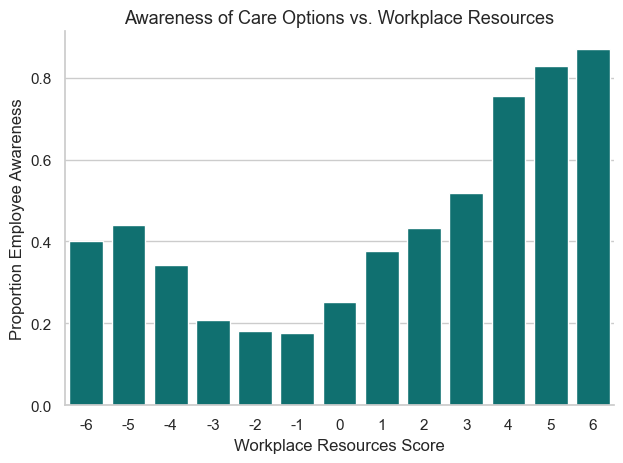

In [32]:
# Group and calculate proportion (mean) of people aware of care options
import os

grouped = survey_coded.groupby('workplace_resources')['care_options'].mean().reset_index()

bars = sns.barplot(
    x='workplace_resources',
    y='care_options',
    data=grouped,
    color='teal'
)

bars.set(xlabel='Workplace Resources Score', ylabel='Proportion Employee Awareness')
bars.set_title('Awareness of Care Options vs. Workplace Resources', fontsize=13)
sns.despine()

# Ensure 'figures' directory exists
os.makedirs('figures', exist_ok=True)

figure = bars.get_figure()
figure.tight_layout()
figure.savefig('figures/resources_and_awareness.png')

plt.show()



- **One possible interpretation is that the more services are available, more people know about them, and where there's none people ALSO know that.**

- **before moving on with our analysis, I would like to see what's the behavior of our willingness score according to some other variables, such as family history, treatment and work interfere**

In [33]:
# group by variable of interest, create a label and rename columns
family_data = survey_coded.groupby('family_history').agg({'willingness':'mean'}).reset_index()
family_data['label'] = ['Family History']*len(family_data)
family_data.rename(columns= {'family_history':'Answer'}, inplace=True)

treatment_data = survey_coded.groupby('treatment').agg({'willingness':'mean'}).reset_index()
treatment_data['label'] = ['Treatment']*len(treatment_data)
treatment_data.rename(columns= {'treatment':'Answer'}, inplace=True)

willingness_variables = pd.concat([family_data, treatment_data], axis=0)
willingness_variables.Answer.replace(to_replace=-1, value='No', inplace=True)
willingness_variables.Answer.replace(to_replace=1, value='Yes', inplace=True)

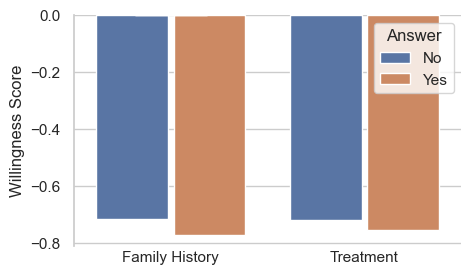

In [34]:
# making a category bar plot
fig, ax = plt.subplots(figsize=(5, 3))

bars= sns.barplot(x="label", y="willingness", hue="Answer", 
            data=willingness_variables)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


change_width(ax, .37)
sns.despine(bottom=True)
bars.set(xlabel= '', ylabel= 'Willingness Score')
bars.tick_params(axis='x', which='both', length=0)

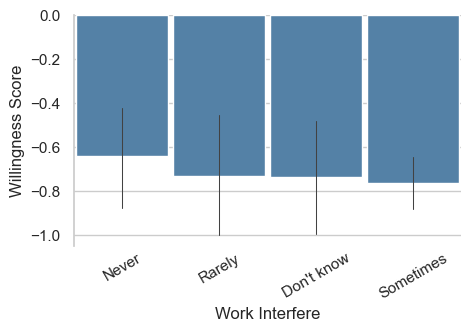

In [36]:
xlabel = 'Work Interfere'
ylabel = 'Willingness Score'

def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

fig, ax = plt.subplots(figsize=(5, 3))
bars = sns.barplot(x='work_interfere', y='willingness', data=survey_coded, color='steelblue', errwidth=0.75)

bars.set(xlabel=xlabel, ylabel=ylabel, xticklabels=['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'])
bars.set_xticklabels(['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'], rotation=30)
sns.despine(bottom=True)
change_width(ax, .95)
bars.tick_params(axis='x', which='both', length=0)

plt.show()


In [37]:
# I also did this analysis for gender but I find it slightly less interesting.
gender_willingness = survey_coded.groupby('gender').agg({'willingness':'mean'})
gender_willingness

,willingness
gender,
1,-1.053333
-1,-0.654776
0,-0.615385


- **contrary to expected, it seems that women are less likely to open up about mental health. However, upon further thinking, this might make sense if we consider that tech is a male-dominated industry where perhaps climbing up the ladder as a woman is significantly harder. in that case, they would be much more scared to bring up these issues and make their lives ever harder?**

In [38]:
# to reach the answer to our main question
willingness_treatment = survey_coded.groupby('workplace_resources').agg({'willingness':'mean'})
willingness_treatment

,willingness
workplace_resources,
-6,-2.600000
-5,-1.323529
-4,-0.975610
-3,-1.316832
-2,-0.818792
-1,-0.782383
0,-0.752809
1,-0.641509
2,-0.453608


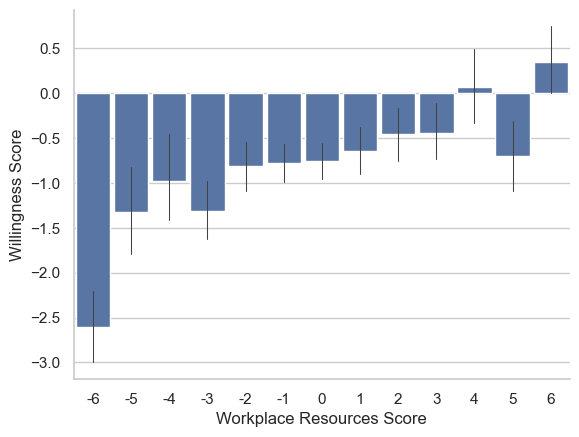

In [39]:
# create a bar plot with the average willingness score for each workplace resourses category
xlabel = 'Workplace Resources Score'
ylabel = 'Willingness Score'

fig, ax = plt.subplots()
bars = sns.barplot(x='workplace_resources', y='willingness', data= survey_coded, 
                    errwidth=0.75)

bars.set(xlabel= xlabel, ylabel= ylabel)
sns.despine()
change_width(ax, .9)

- **it looks like the average willingness score goes up the more resources are available in the company! which is pretty cool**
- **to try and get some statistical power on this we took the raw data and tried to make a linear regression to see if we could predict the willing score of a person using workplace resources.**

In [40]:
# linear regression
x = survey_coded['workplace_resources']
y = survey_coded['willingness']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value is: ' + str(r_value**2))
print ('The std error is: ' + str(std_err))
print(p_value)

The slope is: 0.1242139847676165
The intercept is: -0.7256708196115492
The r_value is: 0.043863098947748515
The std error is: 0.017446155502934102
1.942171101865155e-12


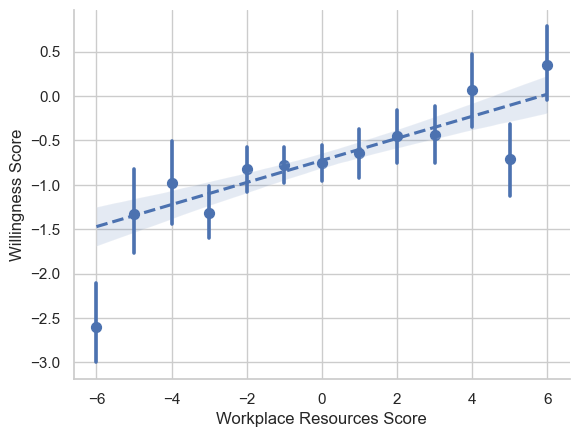

In [43]:
xlabel = 'Workplace Resources Score'
ylabel = 'Willingness Score'

# Ensure 'figures' directory exists
os.makedirs('figures', exist_ok=True)

reg = sns.regplot(x=x, y=y, x_estimator=np.mean,
                  line_kws={'ls':'dashed'})
reg.set(xlabel=xlabel, ylabel=ylabel)
sns.despine()

figure = reg.get_figure()
figure.savefig('figures/resources_willingness_regplot.png')

plt.show()



- **there doesn't seem to be a strong relationship between these variables BUT!**
- **Even though our model only explains a small amount of the variation, when you consider all the things that might affect behavior towards mental health, even a small effect should not be ignored.**

### Age Distribution of Respondents

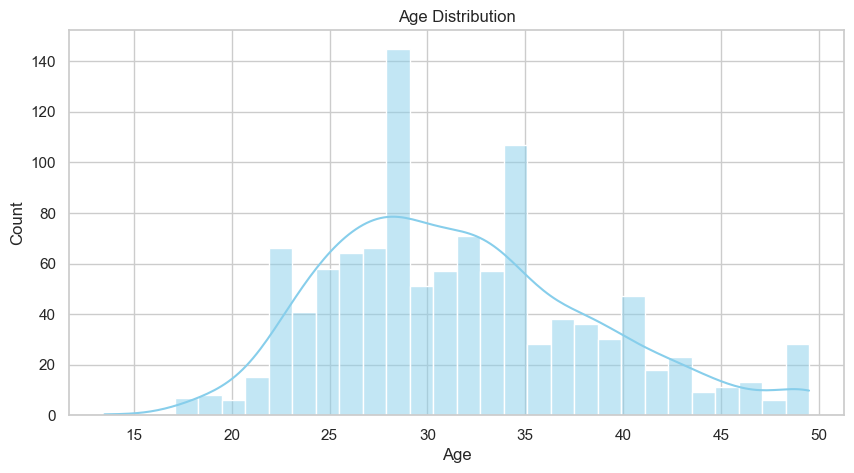

In [44]:

plt.figure(figsize=(10, 5))
sns.histplot(survey['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Gender Distribution

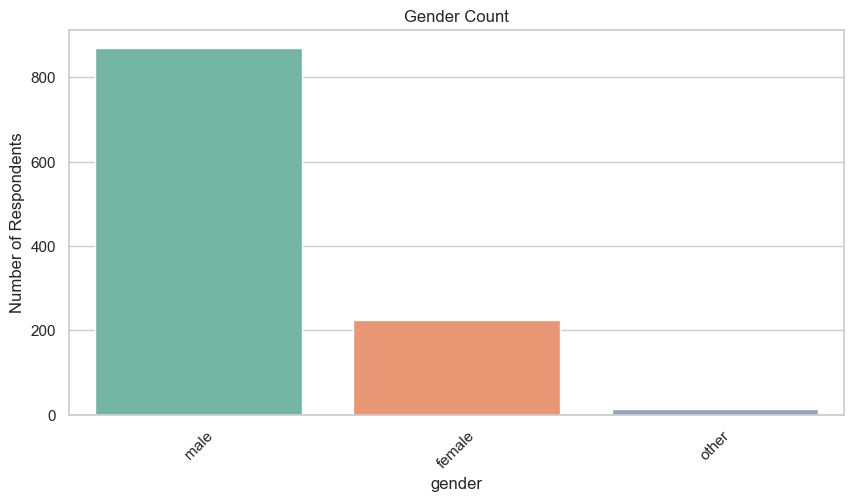

In [45]:

plt.figure(figsize=(10, 5))
sns.countplot(data=survey, x='gender', order=survey['gender'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Gender Count')
plt.ylabel('Number of Respondents')
plt.show()


### Mental Health Treatment by Gender

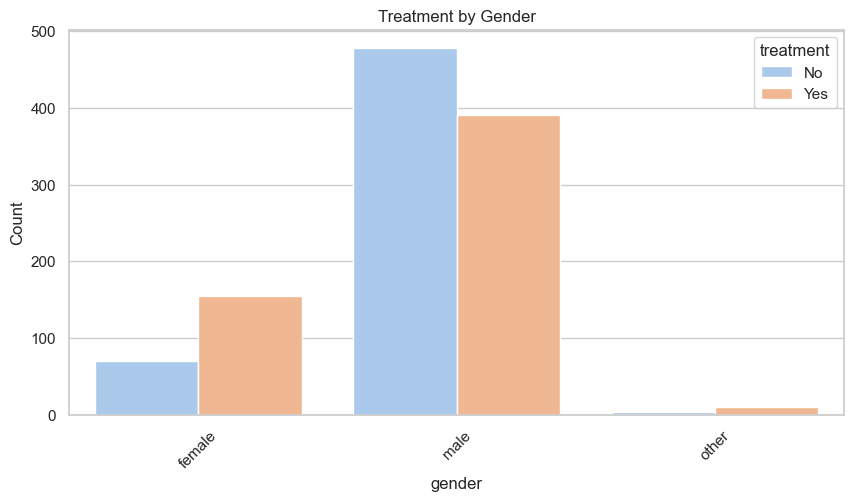

In [47]:

plt.figure(figsize=(10, 5))
sns.countplot(data=survey, x='gender', hue='treatment', palette='pastel')
plt.title('Treatment by Gender')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


### Chi-Square Test: Family History vs Treatment

In [56]:

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(survey['family_history'], survey['treatment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)
if p < 0.05:
    print("There is a significant relationship between family history and treatment.")
else:
    print("There is no significant relationship between family history and treatment.")


Chi-square test p-value: 1.3708586250973773e-36
There is a significant relationship between family history and treatment.


# Useful Insights from Mental Health in Tech Survey Analysis

- The dataset required significant cleaning, including handling missing values, removing duplicates, and normalizing categorical responses for consistency.

- Age data contained outliers and invalid values, which were capped using the IQR method to improve analysis reliability.

- Gender responses were normalized into three categories: male, female, and other, to simplify analysis.

- Many respondents were unaware of mental health care options provided by their employers, with about 30% answering "Don't know" or "No".

- The distribution of willingness to speak about mental health at work is right-skewed, indicating many employees are reluctant to discuss mental health issues openly.

- Workplace resources related to mental health are generally limited, with most companies providing few services.

- There is a positive association between the availability of workplace mental health resources and employees' willingness to speak about mental health, although the relationship is modest.

- Statistical tests suggest a significant relationship between family history of mental illness and seeking treatment.

- Gender differences in willingness to discuss mental health were observed, with women appearing less willing, possibly due to industry dynamics.

- Linear regression showed a small but meaningful effect of workplace resources on willingness to speak, highlighting the importance of mental health support in the workplace.

- Visualizations such as correlation heatmaps and bar plots helped identify key patterns and relationships in the data.

- These insights can guide organizations in improving mental health support and fostering open conversations in tech workplaces.
